# Data Analysis Interview Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at the end of your submission, or in a separate file. We also accept incomplete solutions.

Data description

    ● city: city this user signed up in
    ● phone: primary device for this user
    ● signup_date: date of account registration; in the form ‘YYYYMMDD’
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    ● avg_rating_by_driver: the rider’s average rating over all of their trips
    ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    ● surge_pct: the percent of trips taken with surge multiplier > 1
    ● avg_surge: The average surge multiplier over all of this user’s trips
    ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
    ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
    ● weekday_pct: the percent of the user’s trips occurring during a weekday

# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import json
import datetime
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import random
import numpy as np
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [3]:
#read json as a string
logins=open('logins.json', 'r')
logins_content=logins.read()
logins.close()

#create df from file
data_logins=json.loads(logins_content) #this will handle NAN values
logins_df=pd.DataFrame(data_logins)

#convert logins to datetime format
logins_df.login_time = pd.to_datetime(logins_df.login_time)

#create a column with values of 1
logins_df['val'] =1

logins_df.set_index('login_time',inplace=True)
logins_df.head()

,val
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [4]:
#checked to see if datetime, also observed no null values
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
val    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [5]:
#create function that resamples based on specified intervals 

def resample(data,interval):
    df_resampled = data.resample(interval).count()
    return df_resampled

#create a function to plot the observations
def plot(data, position,title,xlabel='', ylabel=''):
    plt.rcParams['figure.figsize'] = (18, 8)
    plt.subplot(position)
    plt.plot(data['val'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()

C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based in

                     val
login_time              
1970-01-02 00:00:00   10
1970-01-02 00:15:00   18
1970-01-02 00:30:00   12
1970-01-02 00:45:00   13
1970-01-02 01:00:00    9


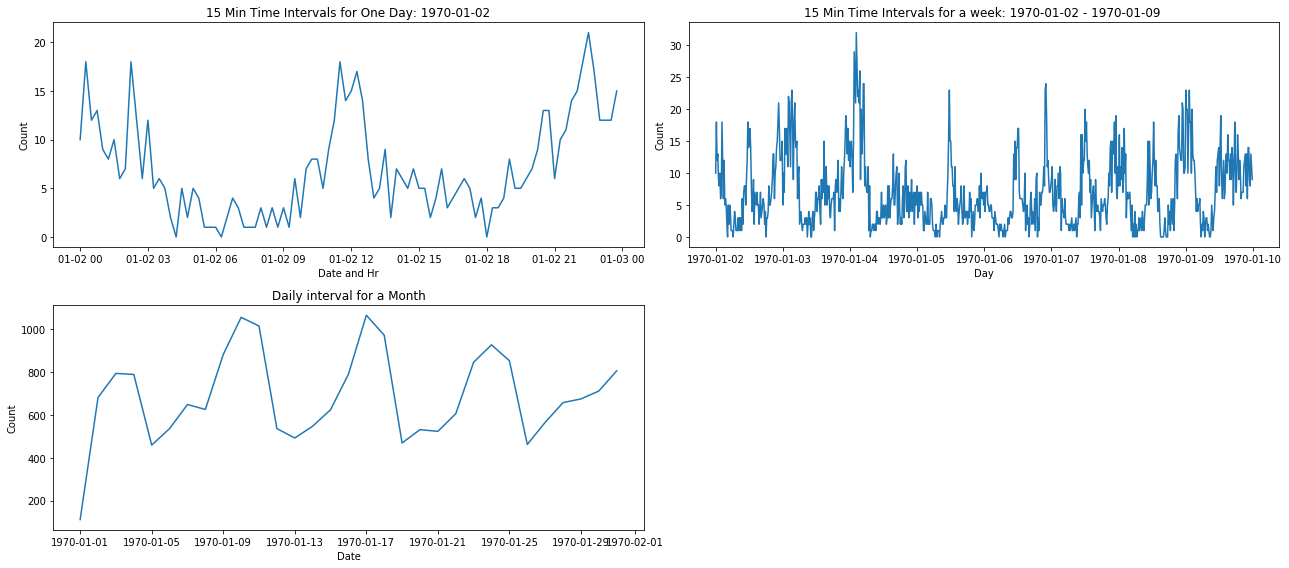

In [6]:
#resample data at multiple intervals to plot
min_15 = resample(logins_df,'15min')
hourly = resample(logins_df,'60min')
daily = resample(logins_df,'D')
monthly = resample(logins_df,'M')

#plot the data with specified intervals
plot(min_15.ix['1970-01-02'],221,'15 Min Time Intervals for One Day: 1970-01-02','Date and Hr', 'Count')
plot(min_15.ix['1970-01-02':'1970-01-09'],222, '15 Min Time Intervals for a week: 1970-01-02 - 1970-01-09 ', 'Day','Count')
plot(daily['1970-01'],223,'Daily interval for a Month','Date','Count')
print(min_15.ix['1970-01-02'].head())


**Trends:**

    It seems that during a day, it is more at night and the afternoon.
    During a week, it is busier on the weekends.

# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

# Part 2 - Solution



1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

    I would check the counts for the login time at similar intervals and see if there is a change in the number of logins. Since during the weekdays, Gotham is more active at night and Metropolis is more active during the day, I would check if the login count is more balanced. The login count is a good way to measure success since it provides information on when the drivers are most active.


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    I would choose a sample of drivers from both cities and use hypothesis testing to verify if the toll reimbursal causes significant change. 

    A two-sample test would be appropriate since we are comparing two sets of data from different cities.
    The central limit theorem (CLT) would apply because the sample distribution can be approximated as normal, random, and independent. The distribution is approximated as normal since the sample size n > 30. The data can be considered independent since the sample n <10% of the population size. 

    I performed a statistical analysis to establish whether toll reimbursal has a significant impact on the activity in the two cities. The statistical analysis was performed using the frequential statistical method. To perform these methods, the null hypothesis was that toll reimbursal had an impact on login activity. Therefore city activity should have a similar rate ($p_G = p_M$ or $p_G - p_M = 0$). The alternative hypothesis was that the toll reimbursal did not have an impact on login activity and it would not be equal ($p_G \neq p_M$ or $p_G - p_M \neq 0$). 

    $H_{o}$ : No significant difference between Gotham and Metropolis activity ($\mu_{G-M} = 0$) 

    $H_{a}$ : Significant difference between Gotham and Metropolis activity ($\mu_{G-M} \neq 0$) 

    Using frequentist statistical testing, we can calculate the p-values from either the Z-test or T-test depending on the sample size. If the p-value is within the confidence interval, we accept the null hypothesis, otherwise we reject it. 

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

# Cleaning

In [7]:
#read json as a string
file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()

#create df from file
data=json.loads(file_content) #this will handle NAN values
data_df=pd.DataFrame(data)
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
#check to see the types of each column
#null values observed in 'phone','avg_rating_by_driver', and 'avg_rating_of_driver'

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
data_df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [10]:
def impute_phone(value):
    ''' Impute the value of phone based on the ratio of observed iPhones to Androids
       
    threshold hardcoded as the ratio of iPhones to total non-null values observed
    Impute and return value as 'Android' or 'iPhone' with this threshold as the probability of iPhone
    
    P(phone='iPhone') = observed_iphones/(observed_iphones + observed_android)
    P(phone='Android') = observed_android/(observed_iphones + observed_android)
    '''
    threshold = 34582/(34582+15022)
    if random.random() > threshold:
        return('Android')
    else:
        return('iPhone')

def clean_df(data):
    """
    Take dataframe and return clean df after performing following cleaning tasks:
    
    """
    # convert date columns to datetime format
    data.signup_date = pd.to_datetime(data.signup_date)
    data.last_trip_date = pd.to_datetime(data.last_trip_date)
    
    # fill missing values with mean values
    data.avg_rating_by_driver.fillna(data['avg_rating_by_driver'].mean(), inplace=True)
    data.avg_rating_of_driver.fillna(data['avg_rating_of_driver'].mean(), inplace=True)
    
    # fill missing values with probability equal to the ratio of observed instances
    data['phone'] = data['phone'].apply(impute_phone)
    
    return data

def retention(data):
    """
    Takes a dataframe
    Returns the dataframe with retention column added and unnecessary columns dropped
    
    """
    # get the most recently recorded 'last trip date'
    last_day = max(data['last_trip_date'])
    
    # calculates 30 days preciding the last trip date
    days = [last_day - datetime.timedelta(days=x) for x in range(0, 30)]
    
    # map a function to check if user is active in last 30 days : 1- active 0-not active
    data['retention'] = data['last_trip_date'].map(lambda x: int(x in days))
    
    #drop columns no longer needed after calculations
    data.drop(['last_trip_date', 'signup_date', 'surge_pct'], axis=1, inplace=True)
    return data

In [11]:
#clean data
data = clean_df(data_df)

#calculate retention column and clean further
data = retention(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retention                 50000 non-null int64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 3.5+ MB


In [12]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,iPhone,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,iPhone,14,False,82.4,0


### Number of Retained vs Not Retained Users

In [13]:
#view number of retained 
print("Retained Users:1 vs Non Retained:0")
print('---------------------------------')
print(data.retention.value_counts())

Retained Users:1 vs Non Retained:0
---------------------------------
0    31690
1    18310
Name: retention, dtype: int64


Therefore there were 18,310 users active in the in the preceding 30 days.

### Fraction of Retained Users

In [14]:
#calculate fraction of retained users (#retained users / total users)
fraction_ret = len(data[data['retention'] == 1])/len(data)
print("Fraction of retained users = ",fraction_ret)

Fraction of retained users =  0.3662


# Exploratory Data Analysis

In [15]:
#further cleaning by assigning numeric (int) values to columns with other data types
#so that data analysis plots can be created
def transform(data):
    '''
    Accepts a dataframe
    returns dataframe with columns mapped as integers
    '''
    
    # map names to int
    col_map = {'Winterfell': 1, 'Astapor': 2, "King's Landing": 3,'iPhone': 1, 'Android': 2}
    data['city']=data['city'].map(lambda s: col_map.get(s) if s in col_map else s)
    data['phone'] = data['phone'].map(lambda s: col_map.get(s) if s in col_map else s)
    data['ultimate_black_user'] = data['ultimate_black_user'].astype('int')
    return data

In [16]:
data = transform(data)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention
0,3.67,5.0,4.7,1.10,3,1,4,1,46.2,1
1,8.26,5.0,5.0,1.00,2,1,0,0,50.0,0
2,0.77,5.0,4.3,1.00,2,1,3,0,100.0,0
3,2.36,4.9,4.6,1.14,3,1,9,1,80.0,1
4,3.13,4.9,4.4,1.19,1,1,14,0,82.4,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
phone                     50000 non-null int64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
retention                 50000 non-null int64
dtypes: float64(5), int32(1), int64(4)
memory usage: 3.6 MB


### Plot histograms for analysis of different column features

For Reference:

    city:                 'Winterfell': 1, 'Astapor': 2, "King's Landing": 3
    phone:                'iPhone': 1, 'Android': 2
    ultimate_black_user:   True:1, False:0
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002600E715A20>,
      dtype=object)

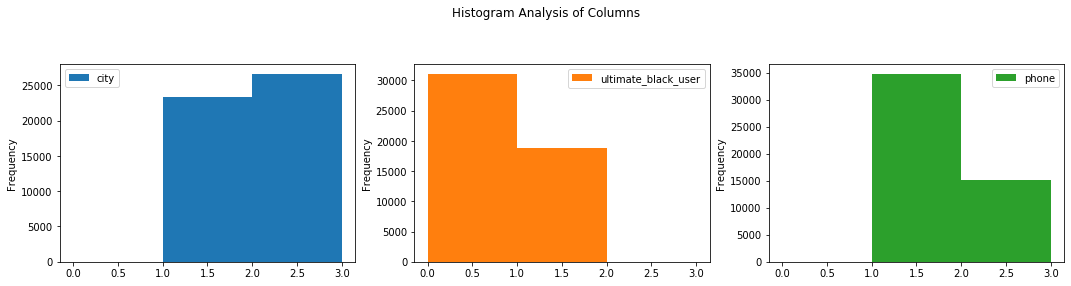

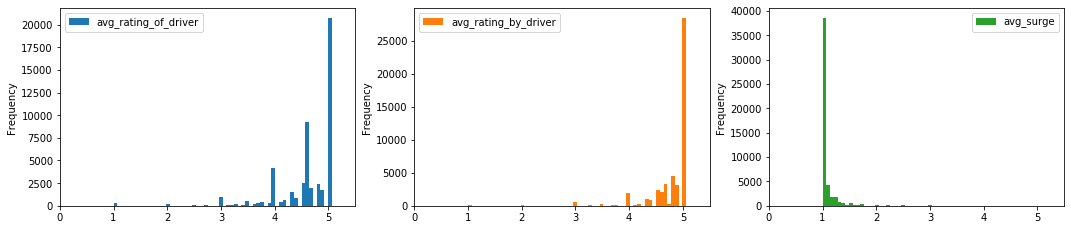

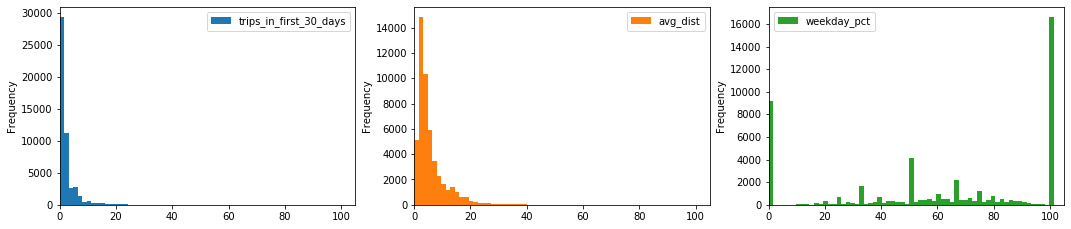

In [18]:
x = data[['city','ultimate_black_user','phone']]
y= data[['avg_rating_of_driver','avg_rating_by_driver','avg_surge']]
z = data[['trips_in_first_30_days','avg_dist','weekday_pct']]

x.plot(kind='hist',
             title='Histogram Analysis of Columns',layout=(2,3), subplots=True,legend=True, bins =3)
y.plot(kind='hist',layout=(2,3), subplots=True,legend=True, bins=100, xlim = (0,5.5))
z.plot(kind='hist',layout=(2,3), subplots=True,legend=True, bins=100, xlim=(0,105))



### Correlation of Features with Retention
We calculate the correlation of our independent variables (features) with the dependent variable (target), retention
and sort in descending order to get a preliminary idea of predictive power of some of our features. This shows that the features most correlated with retention seem to be 'trips_in_first_30_days' and 'ultimate_black_user'.

In [19]:
print(data.corrwith(data.retention).sort_values(ascending=False))

retention                 1.000000
trips_in_first_30_days    0.214728
ultimate_black_user       0.210259
city                      0.169529
weekday_pct               0.026413
avg_surge                -0.003567
phone                    -0.006998
avg_rating_of_driver     -0.010082
avg_rating_by_driver     -0.025595
avg_dist                 -0.090279
dtype: float64


# Predictive Models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

### Data Preprocessing

In [21]:
# Define the feature columns as all of the columns in the data frame except the retention
feature_cols = list(data.columns)
feature_cols.remove('retention')

X = data.loc[:, feature_cols]
X.shape

(50000, 9)

In [22]:
# Define the target variable as retention
y = data.retention
y.shape

(50000,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Instantiante Standard Scalar for preprocessing
standard_scaler = StandardScaler()

# Standardization of training data
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

### Helper Function to Print Results of Classifier

In [25]:
def print_results(test_predictions):
    f1 = f1_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    accuracy = accuracy_score(y_test, test_predictions)
    cm = confusion_matrix(y_test, test_predictions)

    print(cm)
    print('\nAccuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 Score: ', f1)
    print('MSE: ', mean_squared_error(test_predictions, y_test))

### Logistic Regression Classifier

In [26]:
# Instantiate Logistic Regression Model
logreg = LogisticRegression(solver='liblinear')
# Fit logistic regression model using all features
logreg.fit(X_train_standard, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
test_predictions = logreg.predict(X_test_standard)
print('Logistic Regression Using all features and default C=1.0\n')
print_results(test_predictions)

Logistic Regression Using all features and default C=1.0

[[5653  669]
 [2371 1307]]

Accuracy:  0.696
Precision:  0.6614372469635628
Recall:  0.35535617183251766
F1 Score:  0.4623275557127698
MSE:  0.304


In [28]:
# Define a pipeline to select the number of features (k) and logistic regression's regularization parameter (C) using a
# grid search across these two hyperparameters
kbest = SelectKBest(f_classif)
pipeline_lr = Pipeline([('kbest', kbest), ('lr', LogisticRegression())])
grid_search = GridSearchCV(pipeline_lr, {'kbest__k': [1,2,3,4,5,6,7,8,9], 'lr__C': np.logspace(-10, 10, 5)})
grid_search.fit(X_train_standard, y_train)

C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\

C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x000002600E50E158>)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                    

In [29]:
grid_search.best_params_

{'kbest__k': 3, 'lr__C': 1.0}

In [30]:
best_test_predictions = grid_search.predict(X_test_standard)

print('Logistic Regression Using Best Set of Hyperparameters (subset of features and Regularization Coefficient)\n')
print_results(best_test_predictions)

Logistic Regression Using Best Set of Hyperparameters (subset of features and Regularization Coefficient)

[[5676  646]
 [2390 1288]]

Accuracy:  0.6964
Precision:  0.6659772492244054
Recall:  0.35019032082653617
F1 Score:  0.4590163934426229
MSE:  0.3036


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(X_train_standard, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rf_test_predictions = rf_clf.predict(X_test_standard)

print('Random Forest Using all features and 10 estimators\n')
print_results(rf_test_predictions)

Random Forest Using all features and 10 estimators

[[5232 1090]
 [1513 2165]]

Accuracy:  0.7397
Precision:  0.6651305683563749
Recall:  0.5886351277868407
F1 Score:  0.6245492571758258
MSE:  0.2603


In [33]:
rf_pipeline = Pipeline([('kbest', kbest), ('rf', RandomForestClassifier())])
grid_search = GridSearchCV(rf_pipeline, {'kbest__k': [1,2,3,4,5,6,7,8,9], 'rf__n_estimators': [100,200,300]})
grid_search.fit(X_train_standard, y_train)

C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x000002600E50E158>)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                         

In [34]:
grid_search.best_params_

{'kbest__k': 9, 'rf__n_estimators': 300}

In [35]:
cv_test_predictions = grid_search.predict(X_test_standard)

print('Random Forest Using Best Set of Hyperparameters (subset of features and Number of Estimators)\n')
print_results(cv_test_predictions)

Random Forest Using Best Set of Hyperparameters (subset of features and Number of Estimators)

[[5105 1217]
 [1290 2388]]

Accuracy:  0.7493
Precision:  0.6624133148404993
Recall:  0.6492659053833605
F1 Score:  0.6557737196210351
MSE:  0.2507


In [36]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', input_dim=X_train.shape[1]))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'])
classifier.summary()

W1028 16:52:04.378020 11428 deprecation.py:506] From C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1028 16:52:04.444898 11428 deprecation.py:323] From C:\Users\JLH2TCQ\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [37]:
classifier.fit(X_train_standard, y_train, batch_size=10, epochs=10)

Epoch 1/10
40000/40000 [==============================] - 3s 83us/sample - loss: 0.5931 - acc: 0.6971
Epoch 2/10
40000/40000 [==============================] - 3s 81us/sample - loss: 0.5598 - acc: 0.7205
Epoch 3/10
40000/40000 [==============================] - 3s 80us/sample - loss: 0.5511 - acc: 0.7230
Epoch 4/10
40000/40000 [==============================] - 3s 79us/sample - loss: 0.5429 - acc: 0.7299
Epoch 5/10
40000/40000 [==============================] - 3s 79us/sample - loss: 0.5375 - acc: 0.7355
Epoch 6/10
40000/40000 [==============================] - 3s 82us/sample - loss: 0.5323 - acc: 0.7370
Epoch 7/10
40000/40000 [==============================] - 3s 80us/sample - loss: 0.5267 - acc: 0.7404
Epoch 8/10
40000/40000 [==============================] - 3s 79us/sample - loss: 0.5236 - acc: 0.7427
Epoch 9/10
40000/40000 [==============================] - 3s 83us/sample - loss: 0.5222 - acc: 0.7430
Epoch 10/10
40000/40000 [==============================] - 3s 81us/sample - loss: 

In [39]:
nn_predictions = classifier.predict(X_test_standard)
nn_predictions = (nn_predictions>0.5)

print('Neural Network Classifier With 2 Hidden Layers and 4 Neurons per Hidden Layer\n')
print_results(nn_predictions)

Neural Network Classifier With 2 Hidden Layers and 4 Neurons per Hidden Layer

[[5161 1161]
 [1395 2283]]

Accuracy:  0.7444
Precision:  0.6628919860627178
Recall:  0.6207177814029364
F1 Score:  0.641112047177759
MSE:  0.2556
